In [ ]:
import pandas as pd

train = pd.read_csv('/content/train.tsv', sep='\t')
test = pd.read_csv('/content/test.tsv', sep='\t')
valid = pd.read_csv('/content/valid.tsv', sep='\t')

train.head()


,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0.1,0.2,0.3,a mailer
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [ ]:
print(train.columns)

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')


In [ ]:
import pandas as pd

# قراءة الملفات مع الفاصل الصحيح
train = pd.read_csv('/content/train.tsv', sep='\t', header=None)
test = pd.read_csv('/content/test.tsv', sep='\t', header=None)
valid = pd.read_csv('/content/valid.tsv', sep='\t', header=None)

# أسماء الأعمدة الصحيحة
cols = ["id", "label", "statement", "subject", "speaker", "speaker_job",
        "state", "party", "barely_true_counts", "false_counts",
        "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]

# إضافة أسماء الأعمدة
train.columns = cols
test.columns = cols
valid.columns = cols

train.head()


,id,label,statement,subject,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
train_df = train[['label', 'statement']]
test_df = test[['label', 'statement']]
valid_df = valid[['label', 'statement']]

train_df.head()


,label,statement
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


In [ ]:
!pip install transformers datasets torch

In [ ]:
from transformers import BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# تحويل labels إلى أرقام
label_to_id = {
    "true": 0,
    "mostly-true": 1,
    "half-true": 2,
    "barely-true": 3,
    "false": 4,
    "pants-fire": 5
}

# حذف الصفوف التي لا يوجد لها label صحيح
train_df = train_df[train_df['label'].isin(label_to_id)]
test_df = test_df[test_df['label'].isin(label_to_id)]
valid_df = valid_df[valid_df['label'].isin(label_to_id)]

train_df.head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

,label,statement
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, df):
        self.texts = df['statement'].tolist()
        self.labels = [label_to_id[label] for label in df['label']]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label)
        }

train_dataset = FakeNewsDataset(train_df)
valid_dataset = FakeNewsDataset(valid_df)
test_dataset = FakeNewsDataset(test_df)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)


In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=6
).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from tqdm import tqdm

epochs = 2  # يكفي للمشروع

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")


100%|██████████| 558/558 [03:13<00:00,  2.88it/s]


Epoch 1, Loss: 1.7299419036902834


100%|██████████| 558/558 [03:15<00:00,  2.86it/s]

Epoch 2, Loss: 1.6349255829301785


In [ ]:
from sklearn.metrics import accuracy_score

model.eval()
preds = []
true = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].tolist()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1).cpu().tolist()

        preds.extend(predictions)
        true.extend(labels)

accuracy = accuracy_score(true, preds)
accuracy

0.26361483820047354

In [ ]:
def predict(text):
    model.eval()
    encoding = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
    encoding = {k: v.to(device) for k, v in encoding.items()}
    outputs = model(**encoding)
    pred = torch.argmax(outputs.logits, dim=1).item()

    for k, v in label_to_id.items():
        if v == pred:
            return k

predict("The government approved a new law that gives free healthcare to everyone.")


'false'

In [ ]:
# show information
print("Train:", len(train_df))
print("Validation:", len(valid_df))
print("Test:", len(test_df))


Train: 8919
Validation: 1284
Test: 1267


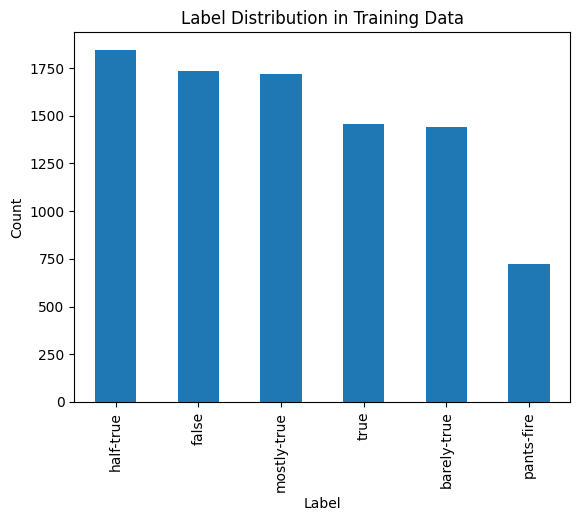

In [ ]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().plot(kind='bar')
plt.title("Label Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


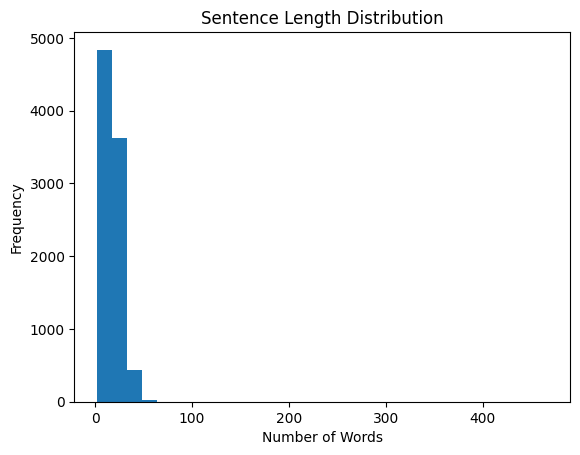

In [ ]:
train_df['text_len'] = train_df['statement'].apply(lambda x: len(x.split()))

plt.hist(train_df['text_len'], bins=30)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Train samples:", len(train_df))
print("Validation samples:", len(valid_df))
print("Test samples:", len(test_df))

print("\nTraining columns:")
print(train_df.columns)


Train samples: 8919
Validation samples: 1284
Test samples: 1267

Training columns:
Index(['label', 'statement', 'text_len'], dtype='object')


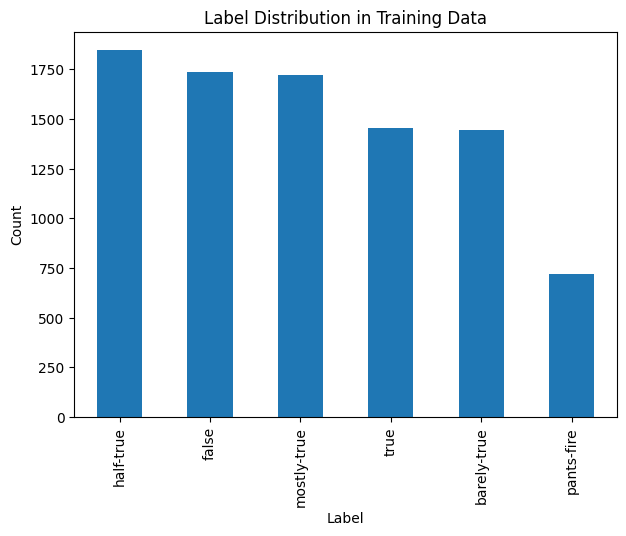

In [ ]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().plot(kind='bar', figsize=(7,5))
plt.title("Label Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [ ]:
train_df['text_len'] = train_df['statement'].apply(lambda x: len(str(x).split()))
train_df['text_len'].describe()


,text_len
count,8919.000000
mean,18.037448
std,9.913392
min,2.000000
25%,12.000000
50%,17.000000
75%,22.000000
max,467.000000


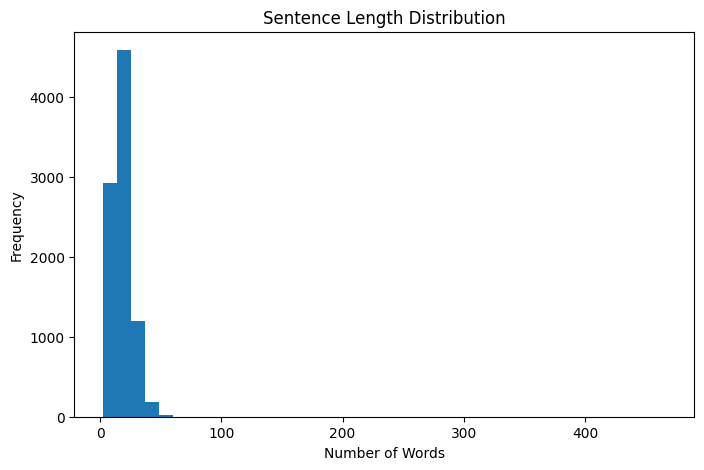

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(train_df['text_len'], bins=40)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
train_df.sample(50)


,label,statement,text_len
4552,half-true,Twenty four states have voter ID or comparable...,17
617,pants-fire,"Wisconsin has only one county, Dane, thats han...",16
3717,barely-true,"Six years after unionization, 20,000 fewer chi...",20
10,mostly-true,"For the first time in history, the share of th...",21
4301,true,Theres a big chunk of the country that thinks ...,18
3817,half-true,Alison Alter has exploited a campaign finance ...,19
4011,mostly-true,"In 2009, the Small Business Entrepreneurship C...",22
3226,mostly-true,"After they bought GST Steel, Mitt Romney and h...",38
6513,true,Says first eight chosen to draw Austin City Co...,20
6721,mostly-true,(McCain) was opposed to ethanol. Now he's for it.,9


In [ ]:
example = train_df.iloc[0]['statement']
encoded = tokenizer(example, return_tensors='pt', max_length=128, padding='max_length', truncation=True)

print("Original text:")
print(example)
print("\nTokenized IDs:")
print(encoded['input_ids'])


Original text:
Says the Annies List political group supports third-trimester abortions on demand.

Tokenized IDs:
tensor([[  101,  2758,  1996,  8194,  2015,  2862,  2576,  2177,  6753,  2353,
          1011, 12241, 20367, 11324,  2015,  2006,  5157,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,  

In [ ]:
print("Model Accuracy on Test Set:", accuracy)


Model Accuracy on Test Set: 0.26361483820047354
